# CSCI 184 Homework #2
# Patrick Callahan, Arjun Chimni, Andrew Schulz
# 1) Naive Bayes – Cancer Tumor Classification

### For this part, you will focus on a cancer dataset that comprises of 569 rows and 32 columns and perform Naive Bayes Classification.

### 1. Load the dataset from ‘cancer.csv’ into a pandas DataFrame and print it along with its shape. ‘diagnosis’ is the target variable.

In [94]:
import pandas as pd
import numpy as np
temp = pd.read_csv('cancer.csv') #load the csv
cancer_df = pd.DataFrame(temp) #read it as a dataframe
print(cancer_df.shape) #print the shape of the dataframe
cancer_df #print the data

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### 2. Print the column names and the data type of each column.

In [95]:
print(list(cancer_df.columns)) #print the column names

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [96]:
print(cancer_df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 3. Plot the ‘Radius Mean’ VS ‘Texture Mean’ along with the classes represented as colors or shapes. Is the data linearly separable?

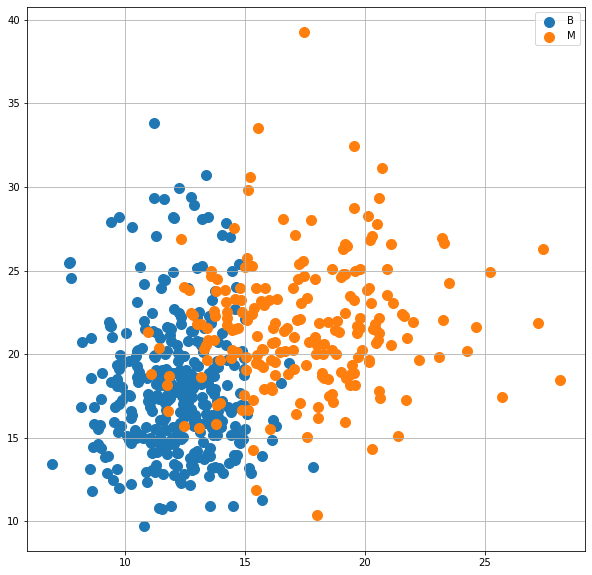

In [97]:
import matplotlib.pyplot as plt

x = cancer_df['radius_mean']
y = cancer_df['texture_mean']
classes = cancer_df['diagnosis']
cdict = {1: 'red', 2: 'blue'}

fig, ax = plt.subplots(figsize=(10, 10))
for g in np.unique(classes):
    ix = np.where(classes == g)
    ax.scatter(x.iloc[ix], y.iloc[ix], label = g, s = 100)
ax.legend()
ax.grid(True)

plt.show()

### 4. Perform encoding on the target variable (here label encoding will suffice)

In [98]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
cancer_df['Target'] = labelencoder.fit_transform(cancer_df['diagnosis'])

cancer_df.shape
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


### 5. Divide the data into X and Y, where X is the set of features and Y is the target variable.

In [99]:
#step 1: Find the 25 best features using the wrapper method

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

del cancer_df['diagnosis']
X = cancer_df.iloc[:,:31]
y = cancer_df.iloc[:,-1]

sfs = SFS(LinearRegression(),k_features=25,forward=True,floating=False,scoring = 'r2',cv = 0)
sfs.fit(X, y)

best_features_df = pd.DataFrame(sfs.subsets_).transpose()
selected_features = best_features_df['feature_names'].iloc[[-1]]
for i in selected_features:
    print(counter)
    print(i)
    

1
('id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')


In [100]:
#step 2: split the data into X and Y
del cancer_df['smoothness_mean']
del cancer_df['id']
del cancer_df['symmetry_mean']
del cancer_df['fractal_dimension_mean']
del cancer_df['texture_se']
del cancer_df['perimeter_worst']
del cancer_df['compactness_worst']
del cancer_df['Unnamed: 32']

In [101]:
X_model = cancer_df.iloc[:,:25]
Y_model = cancer_df.iloc[:,-1]

### 6. Split the data into train and test data. Choose a split size of 70 - 30.

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### 7. Given the nature of the data and its features, choose which Naive Bayes is the most suitable. Mention this in your report along with why you chose the same. You may use the Naive Bayes from sklearn

In [103]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### 8. Once you have trained your model, evaluate the model performance by printing the performance matrix.

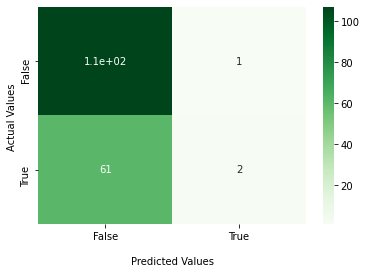

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

y_pred  =  classifier.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Greens')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [105]:
print(accuracy_score(y_test, y_pred))

0.6374269005847953
